In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
           'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
           'lnum_compromised', 'lroot_shell', 'lsu_attempted', 'lnum_root',
           'lnum_file_creations', 'lnum_shells', 'lnum_access_files', 'lnum_outbound_cmds',
           'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate',
           'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
           'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
           'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

In [3]:
df = pd.read_csv("kddcup_data_corrected", sep=",", names=columns)
df.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,normal.


In [4]:
df_filter = df[df['service'] == 'http']
df_filter = df_filter.drop('service', axis=1)
columns.remove('service')
df_filter.head(3)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,SF,215,45076,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,SF,162,4528,0,0,0,0,0,...,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,SF,236,1228,0,0,0,0,0,...,2,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
novelties = df_filter[df_filter['label'] != "normal."]
novelties_normal = df_filter[150000:154045]
novelties = pd.concat([novelties, novelties_normal])
normal = df_filter[df_filter['label'] == 'normal.']

In [6]:
for col in normal.columns:
    if normal[col].dtype == 'object':
        encoded = LabelEncoder()
        encoded.fit(normal[col])
        normal[col] = encoded.transform(normal[col])

for col in novelties.columns:
    if novelties[col].dtype == 'object':
        encoded2 = LabelEncoder()
        encoded2.fit(novelties[col])
        novelties[col] = encoded2.transform(novelties[col])

novelties.head()

/home/tonatiuh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
226685,0,0,3,0,0,0,0,0,0,0,...,1,0.00,0.31,0.53,0.00,0.01,1.00,0.52,0.00,6
226686,0,0,3,0,0,0,0,0,0,0,...,2,0.01,0.31,0.53,0.00,0.02,1.00,0.52,0.00,6
226687,1,0,1,1,0,0,0,0,0,0,...,3,0.01,0.31,0.53,0.00,0.02,0.67,0.52,0.33,6
263531,0,0,0,0,0,0,0,0,0,0,...,194,0.02,1.00,0.02,0.04,0.00,0.00,0.93,0.01,1
263734,0,0,0,0,0,0,0,0,0,0,...,2,0.02,1.00,0.02,1.00,0.00,0.00,0.92,1.00,1


In [7]:
for i in range(0, 3):
    normal = normal.iloc[np.random.permutation(len(normal))]
    
df_smart = pd.concat([normal[:100000], normal[200000:250000]])
df_validate = normal[100000:150000]

x_train, x_test = train_test_split(df_smart, test_size=0.2, random_state=7)

x_val = df_validate

print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(120000, 41)
(30000, 41)
(50000, 41)


In [8]:
ocsvm = OneClassSVM(kernel='rbf', gamma=0.00005, nu=0.1)
ocsvm.fit(x_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=5e-05, kernel='rbf',
            max_iter=-1, nu=0.1, shrinking=True, tol=0.001, verbose=False)

In [9]:
preds = ocsvm.predict(x_test)
score = 0
for f in range(0, x_test.shape[0]):
    if(preds[f] == 1):
        score = score + 1
accuracy = score/x_test.shape[0]
print("Accuracy : {:.2%}".format(accuracy))

Accuracy : 89.47%


In [10]:
preds = ocsvm.predict(x_val)
score = 0
for f in range(0, x_val.shape[0]):
    if(preds[f] == 1):
        score = score + 1
accuracy = score/x_val.shape[0]
print("Accuracy : {:.2%}".format(accuracy))

Accuracy : 89.44%


In [11]:
preds = ocsvm.predict(novelties)
matches = novelties['label'] == 4

auc = roc_auc_score(preds, matches)
print("AUC: {:.2%}".format(auc))

AUC: 95.81%


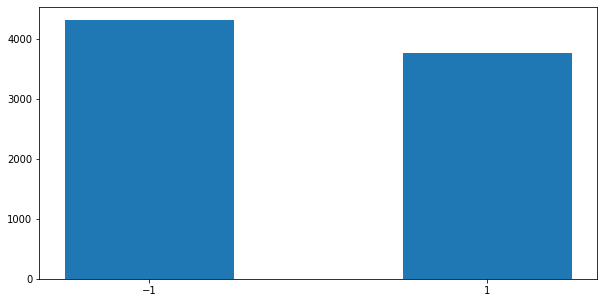

In [12]:
plt.figure(figsize=(10,5))
plt.hist(preds, bins=[-1.5, -0.5] + [0.5, 1.5], align='mid')
plt.xticks([-1, 1])
plt.show()

In [13]:
preds2 = preds == 1
tn, fp, fn, tp = confusion_matrix(matches, preds2).ravel()
print("TN: {}, FP: {}, FN: {}, TP: {}".format(tn, fp, fn, tp))

TN: 4005, FP: 40, FN: 316, TP: 3729
